In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib  import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("E:/springboard/Unit 7/mobile_phone.csv",index_col = 0)

In [3]:
df.isnull().sum()

mobile_name            0
mobile_price           0
mobile_color           0
dual_sim               0
disp_size              0
resolution             0
resolution_multiply    0
os                     0
num_cores              0
mp_speed               0
int_memory             0
ram                    0
p_cam                  0
f_cam                  0
network                0
bluetooth              0
battery_power          0
mob_width              0
mob_height             0
mob_depth              0
mob_weight             0
resolution_x           0
resolution_y           0
disp_size_cm           0
disp_size_inch         0
dtype: int64

In [4]:
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,resolution_multiply,os,num_cores,mp_speed,...,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,resolution_x,resolution_y,disp_size_cm,disp_size_inch
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,2,16.56 cm (6.52 inch),1600 x 720 Pixels,1152000,Android 10,8,2.0,...,Yes,5000,75.0,164.4,8.95,195.0,1600,720,16.56,6.52
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,2,16.56 cm (6.52 inch),1600 x 720 Pixels,1152000,Android 10,8,2.0,...,Yes,5000,75.0,164.4,8.95,195.0,1600,720,16.56,6.52
2,"Realme Narzo 10A (So Blue, 64 GB)",9999,So Blue,2,16.56 cm (6.52 inch),1600 x 720 Pixels,1152000,Android 10,8,2.0,...,Yes,5000,75.0,164.4,8.95,195.0,1600,720,16.56,6.52
3,"Realme Narzo 10A (So White, 64 GB)",9999,So White,2,16.56 cm (6.52 inch),1600 x 720 Pixels,1152000,Android 10,8,2.0,...,Yes,5000,75.0,164.4,8.95,195.0,1600,720,16.56,6.52
4,"Realme Narzo 10 (That Green, 128 GB)",11999,That Green,2,16.51 cm (6.5 inch),1600 x 720 Pixels,1152000,Android 10,8,2.0,...,Yes,5000,75.4,164.4,9.00,199.0,1600,720,16.51,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,"OPPO A83 (Black, 32 GB)",13490,Black,2,14.48 cm (5.7 inch),1440 x 720 Pixels,1036800,Android Nougat 7.1,8,2.5,...,Yes,3180,73.1,150.5,7.70,143.0,1440,720,14.48,5.70
455,"OPPO A83 (Red, 16 GB)",9490,Red,2,14.48 cm (5.7 inch),1440 x 720 Pixels,1036800,Android Nougat 7.1,8,2.5,...,Yes,3180,73.1,150.5,7.70,143.0,1440,720,14.48,5.70
456,"OPPO F7 (Red, 64 GB)",22990,Red,2,15.82 cm (6.23 inch),2280 x 1080 Pixels,2462400,Android Oreo 8.1.0,8,2.0,...,Yes,3400,75.3,156.0,7.80,158.0,2280,1080,15.82,6.23
457,"OPPO F11 (Marble Green, 128 GB)",13990,Marble Green,2,16.59 cm (6.53 inch),1080 x 2340 pixels,2527200,Android Pie 9.0,8,2.1,...,Yes,4020,76.1,162.0,8.30,188.0,1080,2340,16.59,6.53


In [5]:
df.dtypes

mobile_name             object
mobile_price             int64
mobile_color            object
dual_sim                 int64
disp_size               object
resolution              object
resolution_multiply      int64
os                      object
num_cores                int64
mp_speed               float64
int_memory               int64
ram                      int64
p_cam                   object
f_cam                   object
network                 object
bluetooth               object
battery_power            int64
mob_width              float64
mob_height             float64
mob_depth              float64
mob_weight             float64
resolution_x             int64
resolution_y             int64
disp_size_cm           float64
disp_size_inch         float64
dtype: object

In [6]:
df_numeric = df.select_dtypes(include=['int', 'float'])

In [7]:
df_numeric = df_numeric.drop(columns=["resolution_x", "resolution_y","disp_size_inch"])

In [8]:
df_numeric

,mobile_price,dual_sim,resolution_multiply,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size_cm
0,8999,2,1152000,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56
1,8999,2,1152000,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56
2,9999,2,1152000,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56
3,9999,2,1152000,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56
4,11999,2,1152000,8,2.0,128,4,5000,75.4,164.4,9.00,199.0,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,13490,2,1036800,8,2.5,32,3,3180,73.1,150.5,7.70,143.0,14.48
455,9490,2,1036800,8,2.5,16,2,3180,73.1,150.5,7.70,143.0,14.48
456,22990,2,2462400,8,2.0,64,4,3400,75.3,156.0,7.80,158.0,15.82
457,13990,2,2527200,8,2.1,128,4,4020,76.1,162.0,8.30,188.0,16.59


In [9]:
# pairplot

<AxesSubplot:>

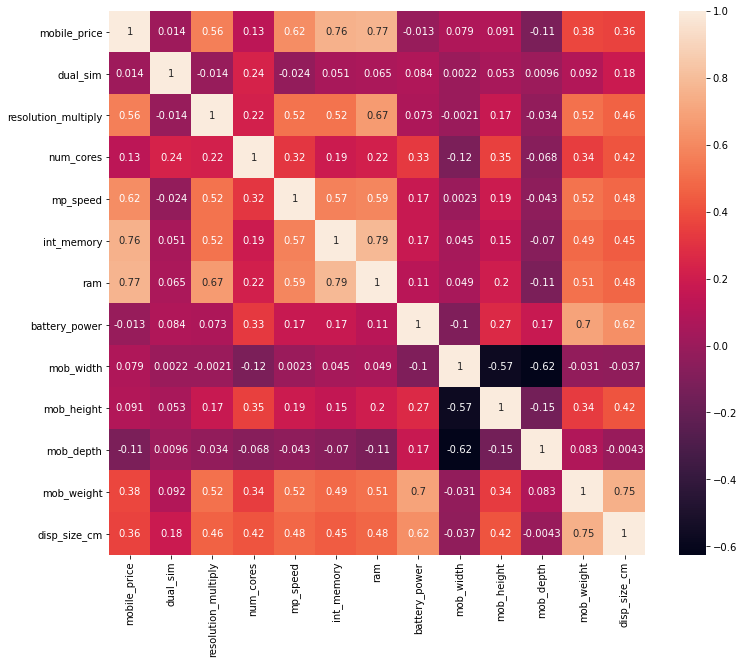

In [10]:
plt.subplots(figsize=(12,10))
df_corr = df.drop(["mobile_name"],axis=1)
sns.heatmap(df_numeric.corr(), annot=True)

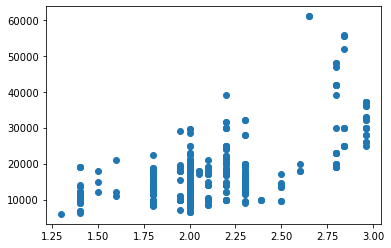

In [11]:
# 0.62
plt.scatter(df["mp_speed"],df["mobile_price"])

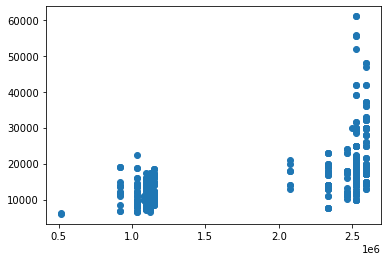

In [12]:
# 0.56
plt.scatter(df["resolution_multiply"],df["mobile_price"])

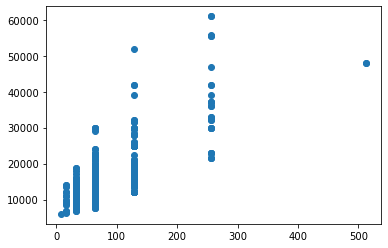

In [13]:
# 0.76
plt.scatter(df["int_memory"],df["mobile_price"])

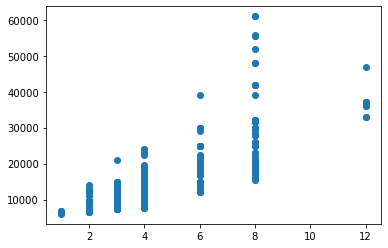

In [14]:
# 0.77
plt.scatter(df["ram"],df["mobile_price"])

In [15]:
df_object = df.select_dtypes(include="object")

In [16]:
df_object = df_object.drop(columns=["mobile_name","disp_size","disp_size","resolution"])

In [17]:
counts = df_object["p_cam"].value_counts()

In [18]:
mask_5 = df_object["p_cam"].isin(counts[counts < 5].index)
df_object["p_cam"][mask_5] = "Other"

In [19]:
counts = df_object["f_cam"].value_counts()

In [20]:
mask = df_object["f_cam"].isin(counts[counts < 5].index)
df_object["f_cam"][mask] = "Other"

In [21]:
df_object["f_cam"].value_counts()

16MP Front Camera               112
8MP Front Camera                 65
20MP Front Camera                61
5MP Front Camera                 54
32MP Front Camera                53
13MP Front Camera                45
20MP + 2MP Dual Front Camera     16
32MP + 8MP Dual Front Camera     13
25MP Front Camera                13
Other                             8
24MP Front Camera                 7
16MP + 8MP Dual Front Camera      6
8MP Dual Front Camera             6
Name: f_cam, dtype: int64

In [22]:
dummy =  pd.get_dummies(df_object, columns= ["p_cam","f_cam"])

In [23]:
df_object["mobile_color"].value_counts()

Black              28
Red                20
Gold               19
Blue               14
Rose Gold          10
                   ..
Emerald Green       1
Forest Green        1
Charcoal Blue       1
Moonlight White     1
Twilight Purple     1
Name: mobile_color, Length: 165, dtype: int64

In [24]:
df_object = df_object.drop(columns = ["mobile_color"])

In [25]:
df_object["network"].value_counts()

3G, 4G VOLTE, 4G, 2G        139
3G, 4G VOLTE, 2G             85
4G VOLTE, 4G, 3G, 2G         79
3G, 4G, 2G                   39
4G, 3G, 2G                   26
4G VOLTE, 4G, 2G, 3G         20
4G VOLTE, 3G, 2G             14
3G, 4G VOLTE, 4G             13
4G VOLTE, 3G                 10
4G VOLTE                      8
3G, 4G VOLTE                  8
4G VOLTE, 5G                  4
5G, 4G VOLTE, 4G, 3G, 2G      3
4G, 2G, 3G                    3
4G VOLTE, 4G                  3
2G                            2
3G, 4G                        2
3G                            1
Name: network, dtype: int64

In [26]:
df_object = df_object.drop(columns = ["network","bluetooth"])

In [27]:
counts = df_object["os"].value_counts()

In [28]:
mask = df_object["os"].isin(counts[counts < 5].index)
df_object["os"][mask] = "Other"

In [29]:
df_object["os"].value_counts()

Android Pie 9           126
Android Oreo 8.1         96
Android Pie 9.0          82
Android 10               68
Android Pie 10           16
Android Nougat 7.1.2     14
Android Oreo 8.1.0       13
Other                    12
Android Nougat 7.1       12
Android Nougat 7          7
Android Oreo 8            7
Android Oreo 8.0          6
Name: os, dtype: int64

In [30]:
dummy =  pd.get_dummies(df_object)

In [31]:
dummy

,os_Android 10,os_Android Nougat 7,os_Android Nougat 7.1,os_Android Nougat 7.1.2,os_Android Oreo 8,os_Android Oreo 8.0,os_Android Oreo 8.1,os_Android Oreo 8.1.0,os_Android Pie 10,os_Android Pie 9,...,f_cam_20MP + 2MP Dual Front Camera,f_cam_20MP Front Camera,f_cam_24MP Front Camera,f_cam_25MP Front Camera,f_cam_32MP + 8MP Dual Front Camera,f_cam_32MP Front Camera,f_cam_5MP Front Camera,f_cam_8MP Dual Front Camera,f_cam_8MP Front Camera,f_cam_Other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
455,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
456,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df = pd.concat([df_numeric,dummy], axis =1)

In [33]:
df

,mobile_price,dual_sim,resolution_multiply,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,...,f_cam_20MP + 2MP Dual Front Camera,f_cam_20MP Front Camera,f_cam_24MP Front Camera,f_cam_25MP Front Camera,f_cam_32MP + 8MP Dual Front Camera,f_cam_32MP Front Camera,f_cam_5MP Front Camera,f_cam_8MP Dual Front Camera,f_cam_8MP Front Camera,f_cam_Other
0,8999,2,1152000,8,2.0,32,3,5000,75.0,164.4,...,0,0,0,0,0,0,1,0,0,0
1,8999,2,1152000,8,2.0,32,3,5000,75.0,164.4,...,0,0,0,0,0,0,1,0,0,0
2,9999,2,1152000,8,2.0,64,4,5000,75.0,164.4,...,0,0,0,0,0,0,1,0,0,0
3,9999,2,1152000,8,2.0,64,4,5000,75.0,164.4,...,0,0,0,0,0,0,1,0,0,0
4,11999,2,1152000,8,2.0,128,4,5000,75.4,164.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,13490,2,1036800,8,2.5,32,3,3180,73.1,150.5,...,0,0,0,0,0,0,0,0,1,0
455,9490,2,1036800,8,2.5,16,2,3180,73.1,150.5,...,0,0,0,0,0,0,0,0,1,0
456,22990,2,2462400,8,2.0,64,4,3400,75.3,156.0,...,0,0,0,1,0,0,0,0,0,0
457,13990,2,2527200,8,2.1,128,4,4020,76.1,162.0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
scaled_df = pd.DataFrame(scaled_df, columns=df.columns) 

In [35]:
scaled_df

,mobile_price,dual_sim,resolution_multiply,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,...,f_cam_20MP + 2MP Dual Front Camera,f_cam_20MP Front Camera,f_cam_24MP Front Camera,f_cam_25MP Front Camera,f_cam_32MP + 8MP Dual Front Camera,f_cam_32MP Front Camera,f_cam_5MP Front Camera,f_cam_8MP Dual Front Camera,f_cam_8MP Front Camera,f_cam_Other
0,-0.879520,0.046727,-1.009722,0.18086,-0.337398,-0.849575,-0.902576,1.363092,0.058955,0.546276,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,2.738613,-0.115087,-0.406171,-0.133185
1,-0.879520,0.046727,-1.009722,0.18086,-0.337398,-0.849575,-0.902576,1.363092,0.058955,0.546276,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,2.738613,-0.115087,-0.406171,-0.133185
2,-0.764467,0.046727,-1.009722,0.18086,-0.337398,-0.356117,-0.421970,1.363092,0.058955,0.546276,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,2.738613,-0.115087,-0.406171,-0.133185
3,-0.764467,0.046727,-1.009722,0.18086,-0.337398,-0.356117,-0.421970,1.363092,0.058955,0.546276,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,2.738613,-0.115087,-0.406171,-0.133185
4,-0.534360,0.046727,-1.009722,0.18086,-0.337398,0.630798,-0.421970,1.363092,0.089509,0.546276,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,-0.365148,-0.115087,-0.406171,-0.133185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,-0.362815,0.046727,-1.172240,0.18086,1.088672,-0.849575,-0.902576,-1.595146,-0.086174,-0.592461,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,-0.365148,-0.115087,2.462019,-0.133185
455,-0.823029,0.046727,-1.172240,0.18086,1.088672,-1.096304,-1.383182,-1.595146,-0.086174,-0.592461,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,-0.365148,-0.115087,2.462019,-0.133185
456,0.730192,0.046727,0.838927,0.18086,-0.337398,-0.356117,-0.421970,-1.237557,0.081870,-0.141881,...,-0.190046,-0.391492,-0.124446,5.857277,-0.170728,-0.361306,-0.365148,-0.115087,-0.406171,-0.133185
457,-0.305288,0.046727,0.930343,0.18086,-0.052184,0.630798,-0.421970,-0.229805,0.142977,0.349660,...,-0.190046,-0.391492,-0.124446,-0.170728,-0.170728,-0.361306,-0.365148,-0.115087,-0.406171,-0.133185


In [36]:
scaled_df.columns

Index(['mobile_price', 'dual_sim', 'resolution_multiply', 'num_cores',
       'mp_speed', 'int_memory', 'ram', 'battery_power', 'mob_width',
       'mob_height', 'mob_depth', 'mob_weight', 'disp_size_cm',
       'os_Android 10', 'os_Android Nougat 7', 'os_Android Nougat 7.1',
       'os_Android Nougat 7.1.2', 'os_Android Oreo 8', 'os_Android Oreo 8.0',
       'os_Android Oreo 8.1', 'os_Android Oreo 8.1.0', 'os_Android Pie 10',
       'os_Android Pie 9', 'os_Android Pie 9.0', 'os_Other',
       'p_cam_12MP + 2MP', 'p_cam_12MP + 2MP + 2MP', 'p_cam_12MP + 5MP',
       'p_cam_12MP Rear Camera', 'p_cam_13MP + 2MP', 'p_cam_13MP + 8MP + 2MP',
       'p_cam_13MP Rear Camera', 'p_cam_16MP + 2MP', 'p_cam_16MP + 2MP + 8MP',
       'p_cam_16MP + 8MP + 2MP', 'p_cam_16MP Rear Camera', 'p_cam_20MP + 12MP',
       'p_cam_48MP + 13MP + 8MP', 'p_cam_48MP + 5MP', 'p_cam_48MP + 8MP',
       'p_cam_48MP + 8MP + 2MP', 'p_cam_48MP + 8MP + 2MP + 2MP',
       'p_cam_48MP + 8MP + 2MP + 2MP Quad Camera',
       

In [41]:
features = list(scaled_df)

In [43]:
del features[0]

In [45]:
X = scaled_df["mobile_price"]
y = scaled_df[features]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)